## The following steps are to generate OLS and regularization model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
import pickle
df = pd.read_pickle('latest1.pickle')
df1=df[df['takeoff_delay_min']!=df['departure_delay_min']]

### Model 1

In [4]:
df_t1=df1[['takeoff_delay_min', 'departure_delay_min', 'capacity', 'distance','DEP_DELAY', 
            'ARR_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'weekend', 'airline[T.Alaska]', 'airline[T.American]',
       'airline[T.Compass]', 'airline[T.Delta]', 'airline[T.Frontier Flight]',
       'airline[T.Horizon Air]', 'airline[T.JetBlue]', 'airline[T.SkyWest]',
       'airline[T.Southwest]', 'airline[T.Spirit Wings]',
       'airline[T.Sun Country]', 'airline[T.United]', 'timeperiod[T.12-18]', 'timeperiod[T.18-24]',
       'timeperiod[T.6-12]']]
df_t1.loc[(df_t1['takeoff_delay_min']>76)|(df_t1['takeoff_delay_min']<-32),'takeoff_delay_min']=None
df_t1.loc[(df_t1['departure_delay_min']>55)|(df_t1['departure_delay_min']<-47),'departure_delay_min']=None
df_t1=df_t1.dropna()

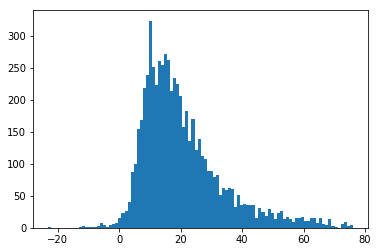

In [5]:
plt.hist(df_t1['takeoff_delay_min'],bins=100);

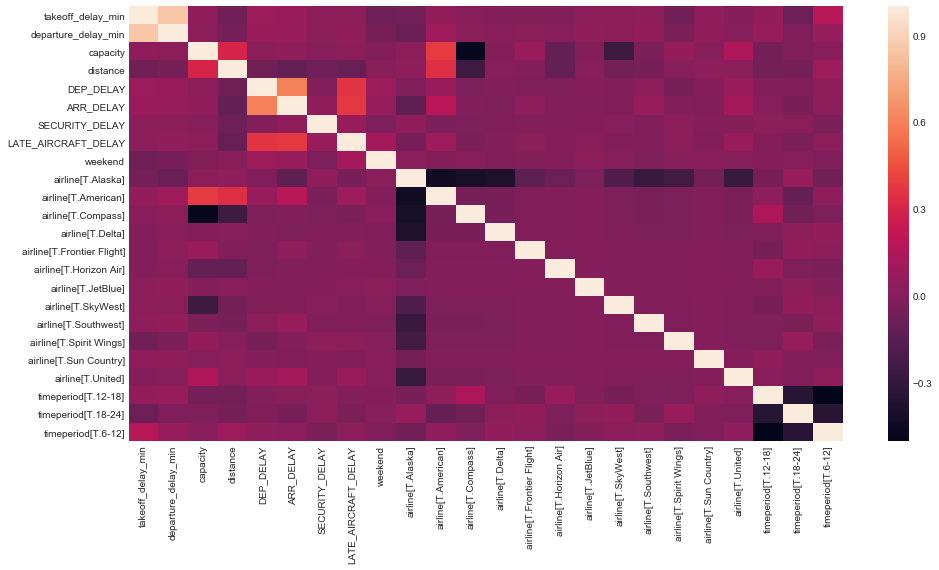

In [6]:
sns.set_style("white")
plt.figure(figsize=(16,8))
sns.heatmap(df_t1.corr(), annot=False);

In [7]:
df_t1c=df_t1[['takeoff_delay_min', 'departure_delay_min', 'DEP_DELAY', 
            'ARR_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

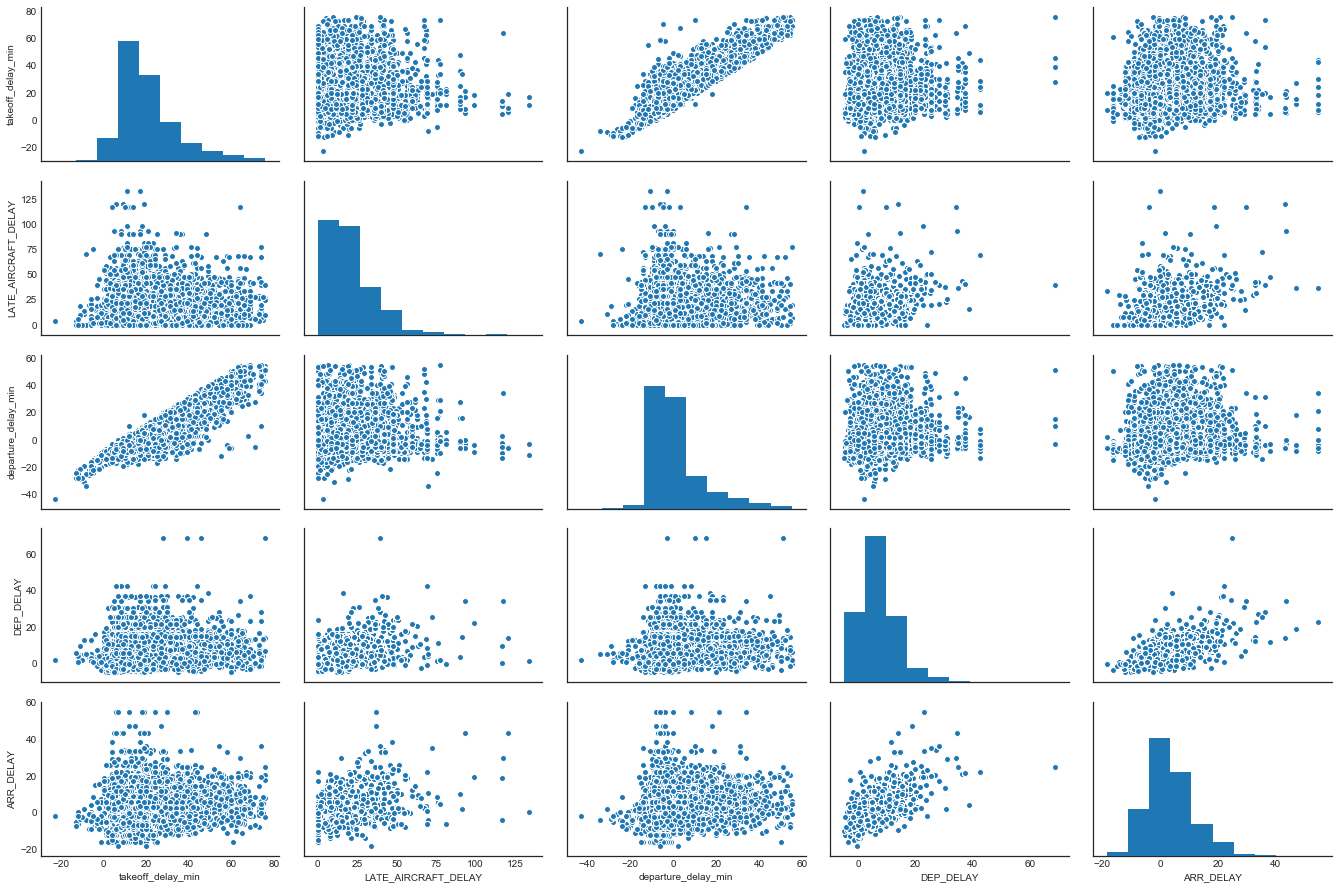

In [8]:
sns.pairplot(df_t1c, aspect=1.5,vars=['takeoff_delay_min', 
            'LATE_AIRCRAFT_DELAY', 'departure_delay_min','DEP_DELAY', 'ARR_DELAY']);

In [9]:
X = df_t1.iloc[:,1:]
y = df_t1.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [10]:
degrees = [1,2,3]

reg = LinearRegression
res_cv = {}
res_train = {}

for i in degrees:
    est = make_pipeline(PolynomialFeatures(i), StandardScaler(), LinearRegression())
    scores = cross_val_score(est, X_train, y_train, cv=10, scoring='mean_squared_error')
    res_cv[i] = np.mean(-scores)
    
    est.fit(X_train,y_train)
    y_pred = est.predict(X_train)
    res_train[i] = np.sum((y_pred-y_train)**2)/len(y_train)



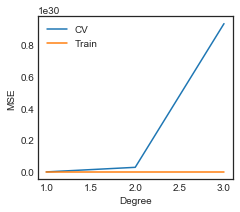

In [11]:
degrees = list(res_cv.keys())
mse_cv = list(res_cv.values())
mse_train = list(res_train.values())

plt.figure(figsize=[3.5,3])
plt.plot(degrees,mse_cv)
plt.plot(degrees,mse_train)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend(['CV','Train'])


loc = np.argmin(list(res_cv.values()))
plt.savefig('degree.png', dpi=500)


In [12]:
train_error=[]
test_error=[]
test_error2=[]
train_error2=[]

alpha= [.1,.2,.3,.4,.5]
for i in alpha:
    est = make_pipeline(PolynomialFeatures(1), StandardScaler(), Ridge(alpha=i))
    est2 = make_pipeline(PolynomialFeatures(2),StandardScaler(), Ridge(alpha=i))
    est.fit(X_train, y_train)
    est2.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_test, est.predict(X_test)))
    test_error.append(mean_squared_error(y_train, est.predict(X_train)))
    train_error2.append(mean_squared_error(y_train, est2.predict(X_train)))
    test_error2.append(mean_squared_error(y_test, est2.predict(X_test)))


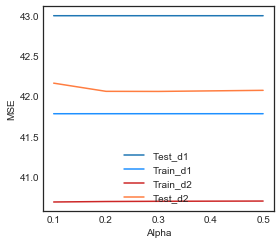

In [13]:
plt.figure(figsize=[4,3.5])


plt.plot(alpha,test_error,label='Test_d1')
plt.plot(alpha,train_error,label='Train_d1',c='#1E90FF')
plt.plot(alpha,train_error2,label='Train_d2',c='#CD2626')
plt.plot(alpha,test_error2,label='Test_d2',c='#FF7D40')
plt.legend(loc=0)
plt.xlabel('Alpha')
plt.ylabel('MSE');
plt.tight_layout()
plt.savefig('Alpha.png', dpi=500)


In [14]:
est = make_pipeline(PolynomialFeatures(2),StandardScaler(),Ridge(alpha=0.1))
est.fit(X, y)
error = mean_squared_error(y, est.predict(X))
print(error, np.sqrt(error))

40.457633890339835 6.360631563794576


In [15]:
est.score(X,y)

0.7821987998131612

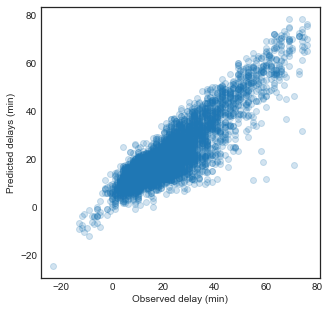

In [16]:
y_predict=est.predict(X)
plt.figure(figsize=(5,5))
plt.scatter(y,y_predict,alpha=0.2)
plt.xlabel('Observed delay (min)')
plt.ylabel('Predicted delays (min)')


plt.savefig('predicted.png',dpi=500)

### Model 2

In [17]:
df_t2=df1[['takeoff_delay_min','capacity', 
            'ARR_DELAY','departure_delay_min', 'LATE_AIRCRAFT_DELAY', 'weekend','days_from_holiday','airline[T.Alaska]', 'airline[T.American]',
       'airline[T.Compass]', 'airline[T.Delta]', 'airline[T.Frontier Flight]',
       'airline[T.Horizon Air]', 'airline[T.JetBlue]', 'airline[T.SkyWest]',
       'airline[T.Southwest]', 'airline[T.Spirit Wings]',
       'airline[T.Sun Country]', 'airline[T.United]', 'timeperiod[T.12-18]', 'timeperiod[T.18-24]',
       'timeperiod[T.6-12]','distance','SECURITY_DELAY']]

In [18]:
df_t2.columns=['takeoff_delay', 'capacity','arrival_delay', 
            'departure_delay', 'aircraft_delay', 'weekend','days_from_holiday','airline[T.Alaska]', 'airline[T.American]',
       'airline[T.Compass]', 'airline[T.Delta]', 'airline[T.Frontier Flight]',
       'airline[T.Horizon Air]', 'airline[T.JetBlue]', 'airline[T.SkyWest]',
       'airline[T.Southwest]', 'airline[T.Spirit Wings]',
       'airline[T.Sun Country]', 'airline[T.United]', 'timeperiod[T.12-18]', 'timeperiod[T.18-24]',
       'timeperiod[T.6-12]','distance','security_delay']
df_t2.loc[(df_t2['takeoff_delay']>76)|(df_t2['takeoff_delay']<-32),'takeoff_delay']=None
df_t2.loc[(df_t2['departure_delay']>55)|(df_t2['departure_delay']<-47),'departure_delay']=None
df_t2=df_t2.dropna()

In [19]:
df_t2['days_from_holiday']=np.log(df_t2['days_from_holiday'])

In [20]:
df_t2c=df_t2[['takeoff_delay', 'capacity', 
            'arrival_delay', 'departure_delay','aircraft_delay', 'days_from_holiday','security_delay']]

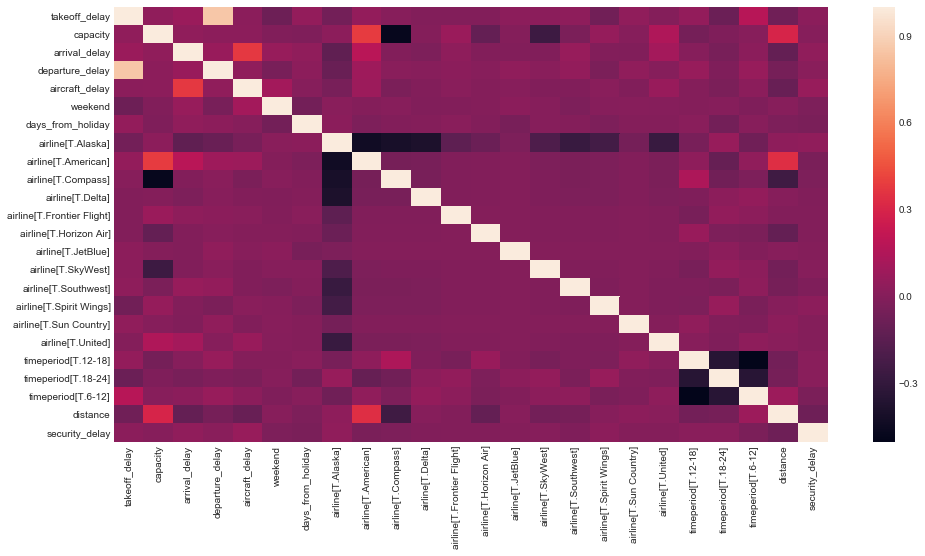

In [21]:
sns.set_style("white")
plt.figure(figsize=(16,8))

sns.heatmap(df_t2.corr(), annot=False);

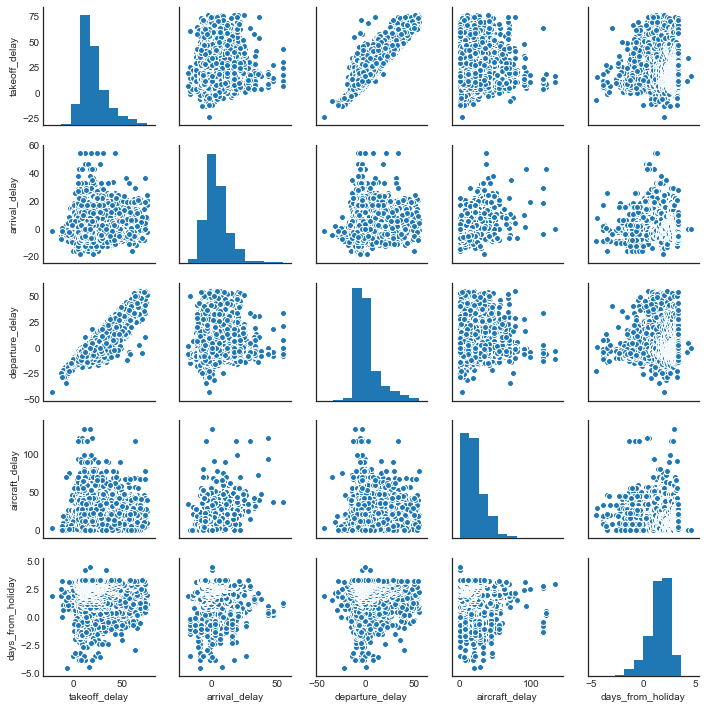

In [22]:
sns.pairplot(df_t2c,size=2,vars=['takeoff_delay', 
            'arrival_delay', 'departure_delay','aircraft_delay', 'days_from_holiday']);

In [23]:

X2 = df_t2.iloc[:,1:]
y2 = df_t2.iloc[:,0]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=42)


In [24]:
degrees = [1,2,3]

reg = LinearRegression
res_cv = {}
res_train = {}

for i in degrees:
    est = make_pipeline(PolynomialFeatures(i), StandardScaler(),Ridge(alpha=5) )
    scores = cross_val_score(est, X2_train, y2_train, cv=10, scoring='mean_squared_error')
    res_cv[i] = np.mean(-scores)
    
    est.fit(X2_train,y2_train)
    y2_pred = est.predict(X2_train)
    res_train[i] = np.sum((y2_pred-y2_train)**2)/len(y2_train)


The degree 1 had an MSE of: 43.43508048843398


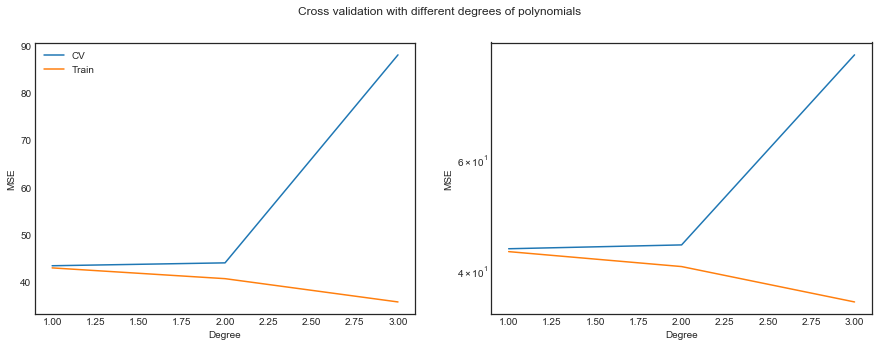

In [25]:
degrees = list(res_cv.keys())
mse_cv = list(res_cv.values())
mse_train = list(res_train.values())

plt.figure(figsize=[15,5])
plt.suptitle('Cross validation with different degrees of polynomials')

plt.subplot(1,2,1)
plt.plot(degrees,mse_cv)
plt.plot(degrees,mse_train)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend(['CV','Train'])
#plt.title('Normal Scale')

plt.subplot(1,2,2)
plt.semilogy(degrees,mse_cv)
plt.semilogy(degrees,mse_train)
plt.xlabel('Degree')
plt.ylabel('MSE')
#plt.title('Log Scale')

loc = np.argmin(list(res_cv.values()))


print('The degree',degrees[loc],'had an MSE of:',mse_cv[loc])

In [26]:
train_error2=[]
test_error2=[]

alphas = [0.1,1,5,10,15]
for i in alphas:
    est = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=i))
    # make_pipeline equals the following:
# p=polynomial(),s=standardscaler,l=LR(), x1=p.fit(x1), x3=s.fit(x2),x4=LR.fit(x3)
    est.fit(X2_train, y2_train)
    train_error2.append(mean_squared_error(y2_train, est.predict(X2_train)))
    test_error2.append(mean_squared_error(y2_test, est.predict(X2_test)))

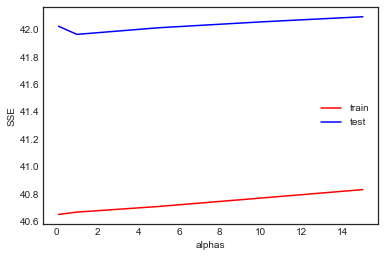

In [27]:
plt.plot(alphas,train_error2,label='train',c='r')
plt.plot(alphas,test_error2,label='test',c='b')
#plt.ylim(0,0.5)
plt.legend()
plt.xlabel('alphas')
plt.ylabel('SSE');

In [28]:
est = make_pipeline(PolynomialFeatures(2),StandardScaler(),Ridge(alpha=5))
est.fit(X2_train, y2_train)
train_error = mean_squared_error(y2_train, est.predict(X2_train))
test_error = mean_squared_error(y2_test, est.predict(X2_test))

In [29]:
est.score(X2_train,y2_train)

0.7831534073259635

In [30]:
test_error

42.013308286779086

In [31]:
y2_predict=est.predict(X2_test)

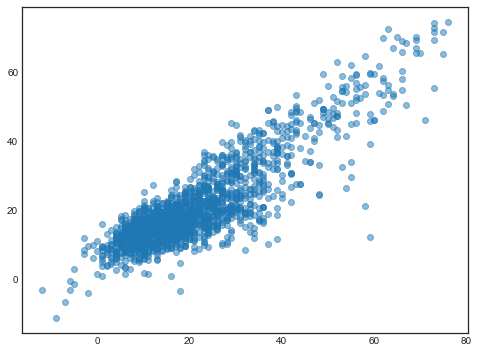

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(y2_test,y2_predict,alpha=0.5);

In [33]:
est = make_pipeline(PolynomialFeatures(2),StandardScaler(),Ridge(alpha=5))
est.fit(X, y)
error = mean_squared_error(y, est.predict(X))
print(error, np.sqrt(error))

40.506076634202586 6.364438438244382
